**Mount Google Drive in Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Accessing the Dataset file**

In [ ]:
import pandas as pd

file_path = '/content/Oversampled dhaka_accident_data_classification.xlsx'

try:
  df = pd.read_excel(file_path)
  print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

   ID  Year     Month                                           Location  \
0   1  2007      June             Rail Gate Signal, Tongi Diversion Road   
1   2  2007       May                            Dhaka Club, Vasani Road   
2   3  2007  December                       1, West Hazir Para, DIT Road   
3   5  2007    August  Sheraton Hotel Crossing, Kazi Nazrul Islam Avenue   
4   8  2007   January                            Lufa Garments, DIT Road   

  Accident_Intensity           Junction    Traffic_Control Weather Lighting  
0              Death    No Intersection       Uncontrolled   Rainy     Dusk  
1              Death    No Intersection       Uncontrolled   Rainy     Dusk  
2              Death    No Intersection       Uncontrolled   Sunny      Day  
3              Death  3-Way/ T junction  Police Controlled   Rainy     Dusk  
4              Death    No Intersection       Uncontrolled   Rainy    Night  


**Printing values from the dataset**

In [ ]:
df.head()

ID  Year     Month                                           Location  \
0   1  2007      June             Rail Gate Signal, Tongi Diversion Road   
1   2  2007       May                            Dhaka Club, Vasani Road   
2   3  2007  December                       1, West Hazir Para, DIT Road   
3   5  2007    August  Sheraton Hotel Crossing, Kazi Nazrul Islam Avenue   
4   8  2007   January                            Lufa Garments, DIT Road   

  Accident_Intensity           Junction    Traffic_Control Weather Lighting  
0              Death    No Intersection       Uncontrolled   Rainy     Dusk  
1              Death    No Intersection       Uncontrolled   Rainy     Dusk  
2              Death    No Intersection       Uncontrolled   Sunny      Day  
3              Death  3-Way/ T junction  Police Controlled   Rainy     Dusk  
4              Death    No Intersection       Uncontrolled   Rainy    Night

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/118IfG4K3eDgKaMow3m7ogInpSLqKSivOYhOXNWu7qV0/edit#gid=0


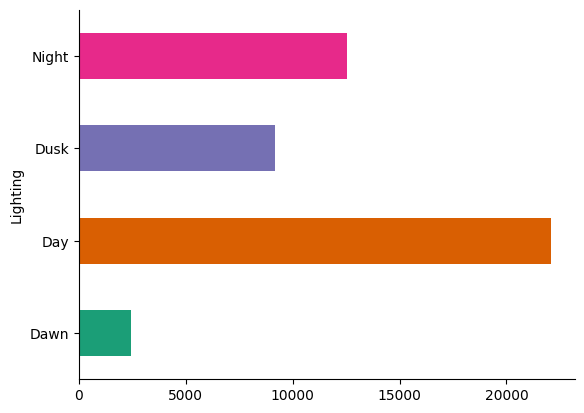

In [ ]:
# @title Lighting

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Lighting').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

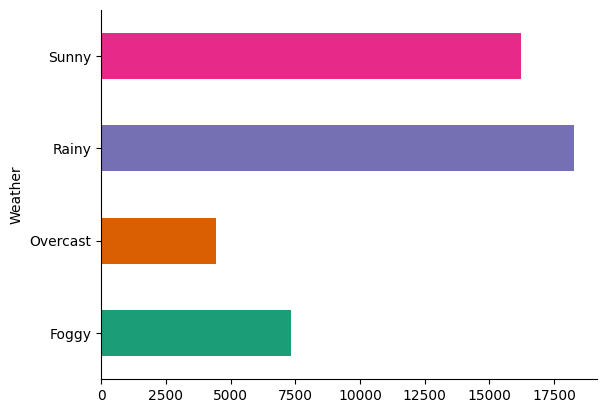

In [ ]:
# @title Weather

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

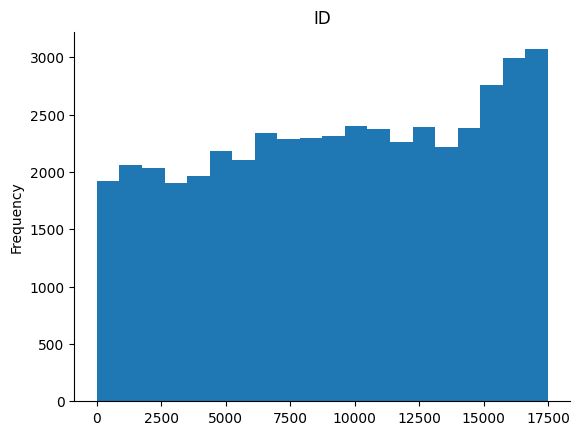

In [ ]:
# @title ID

from matplotlib import pyplot as plt
df['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

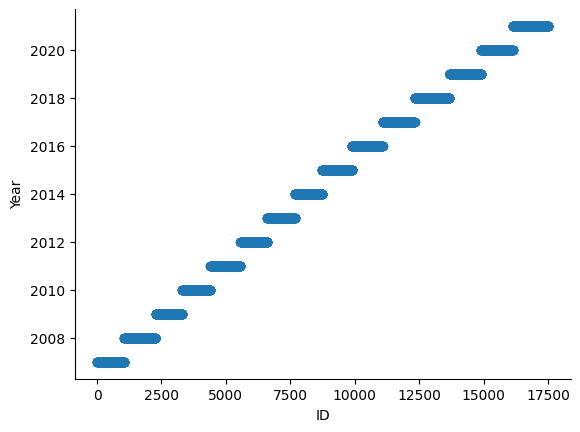

In [ ]:
# @title ID vs Year

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ID', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

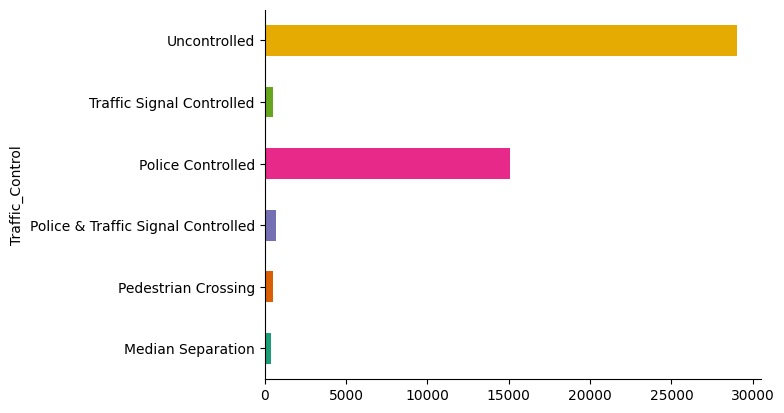

In [ ]:
# @title Traffic_Control

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Traffic_Control').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

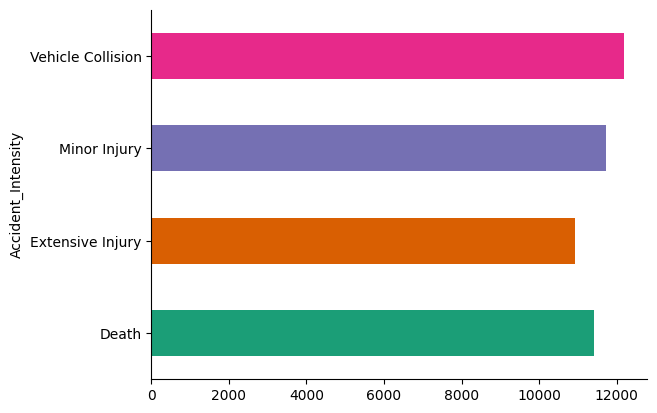

In [ ]:
# @title Accident_Intensity

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Accident_Intensity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

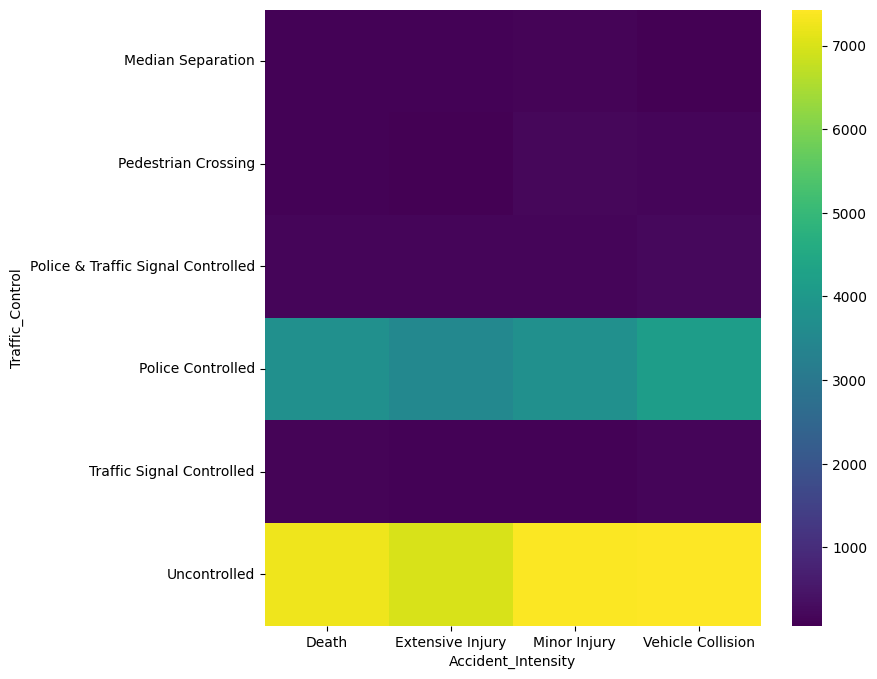

In [ ]:
# @title Accident_Intensity vs Traffic_Control

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Traffic_Control'].value_counts()
    for x_label, grp in df.groupby('Accident_Intensity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Accident_Intensity')
_ = plt.ylabel('Traffic_Control')

<ipython-input-11-bfcdf62c5e05>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='ID', y='Traffic_Control', inner='box', palette='Dark2')


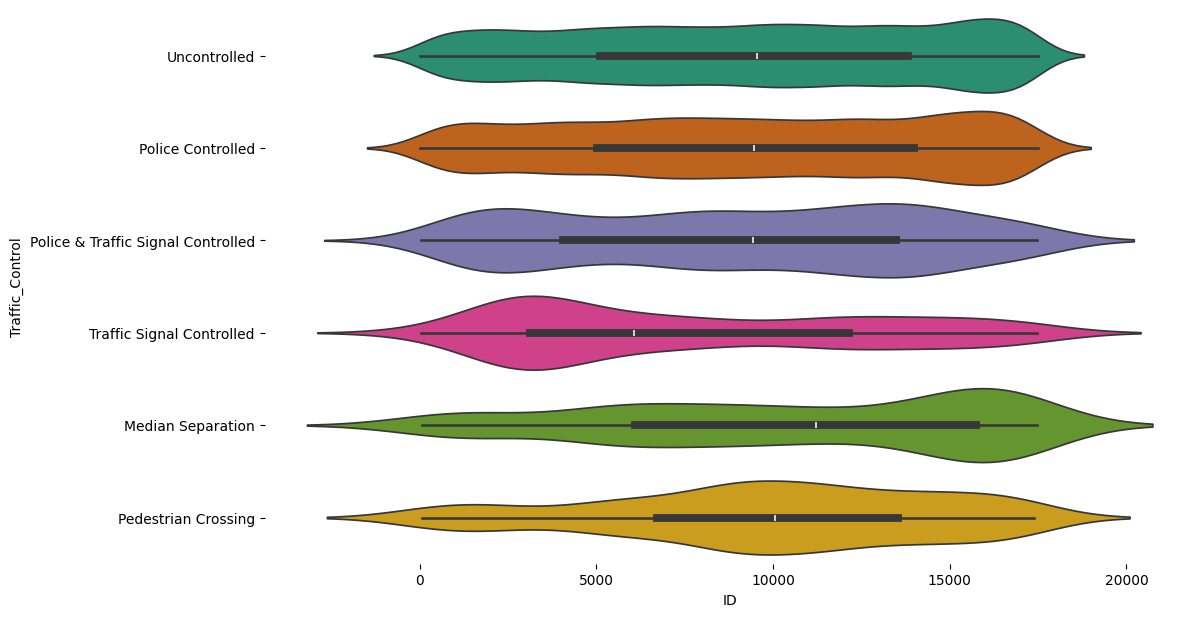

In [ ]:
# @title Traffic_Control vs ID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Traffic_Control'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ID', y='Traffic_Control', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

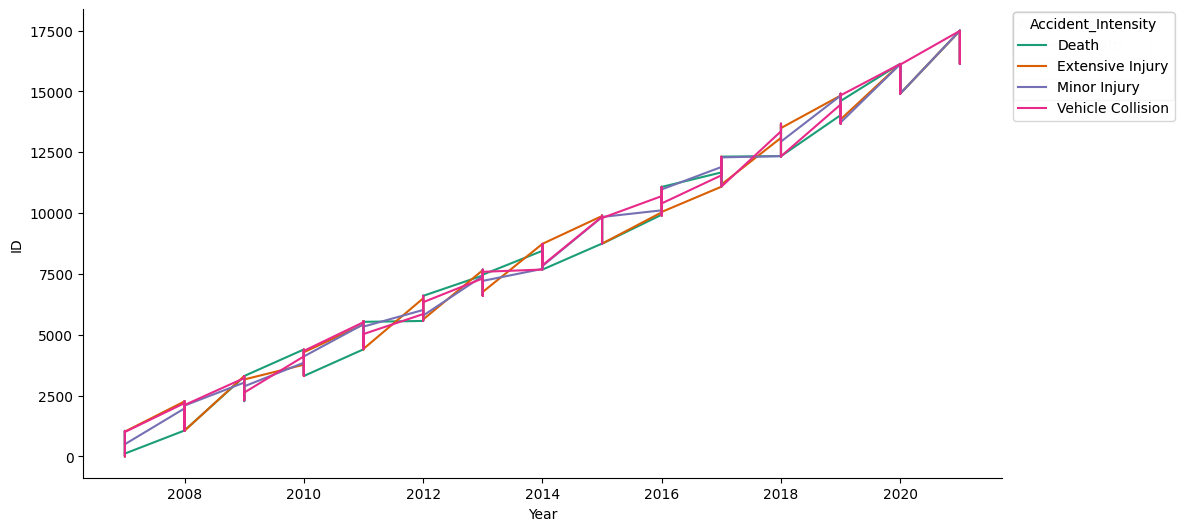

In [ ]:
# @title Year vs ID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Accident_Intensity')):
  _plot_series(series, series_name, i)
  fig.legend(title='Accident_Intensity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('ID')

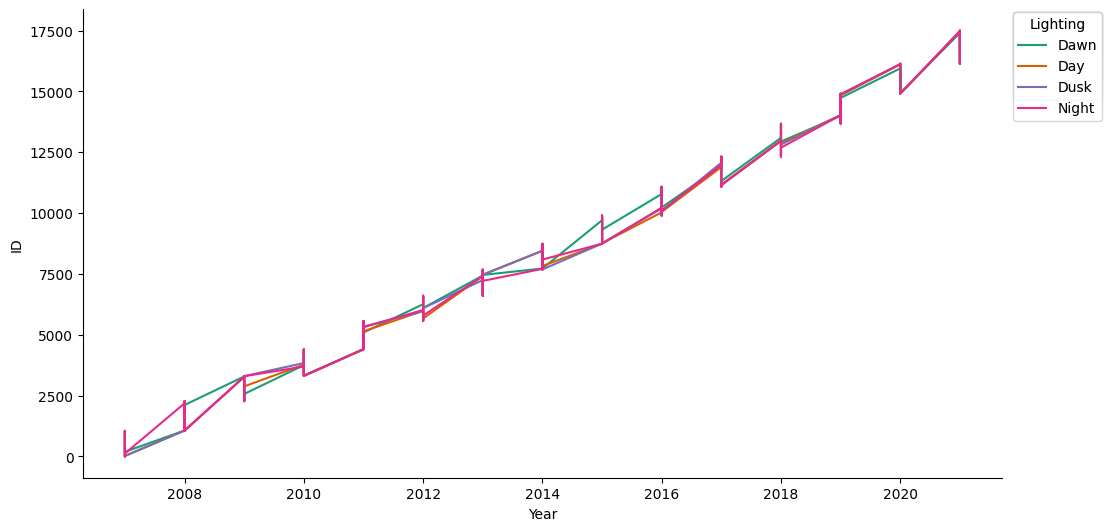

In [ ]:
# @title Year vs ID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Lighting')):
  _plot_series(series, series_name, i)
  fig.legend(title='Lighting', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('ID')

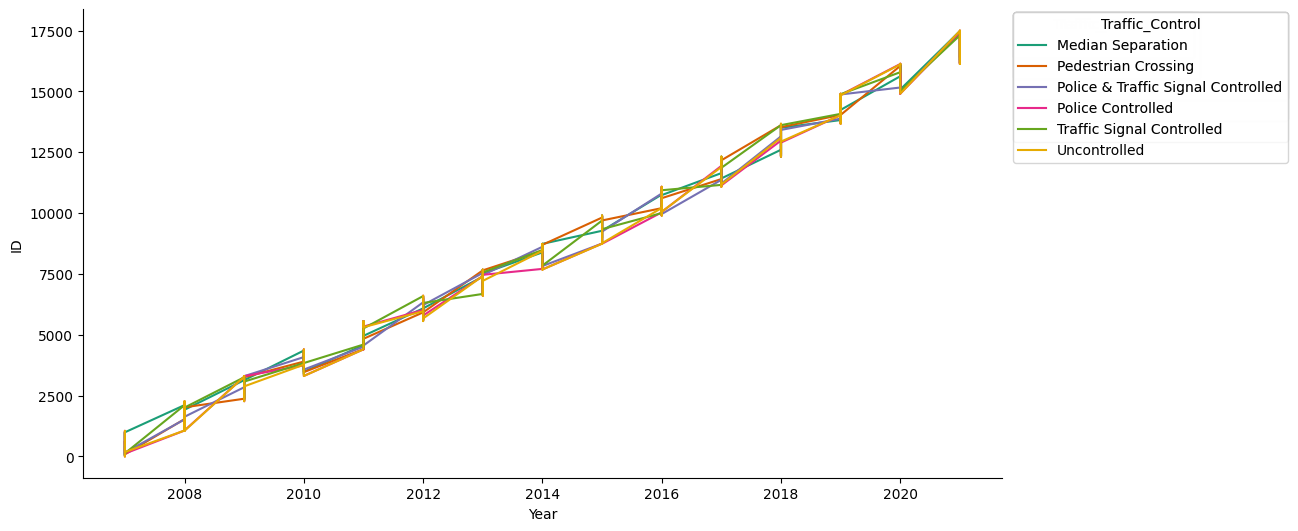

In [ ]:
# @title Year vs ID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Traffic_Control')):
  _plot_series(series, series_name, i)
  fig.legend(title='Traffic_Control', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('ID')

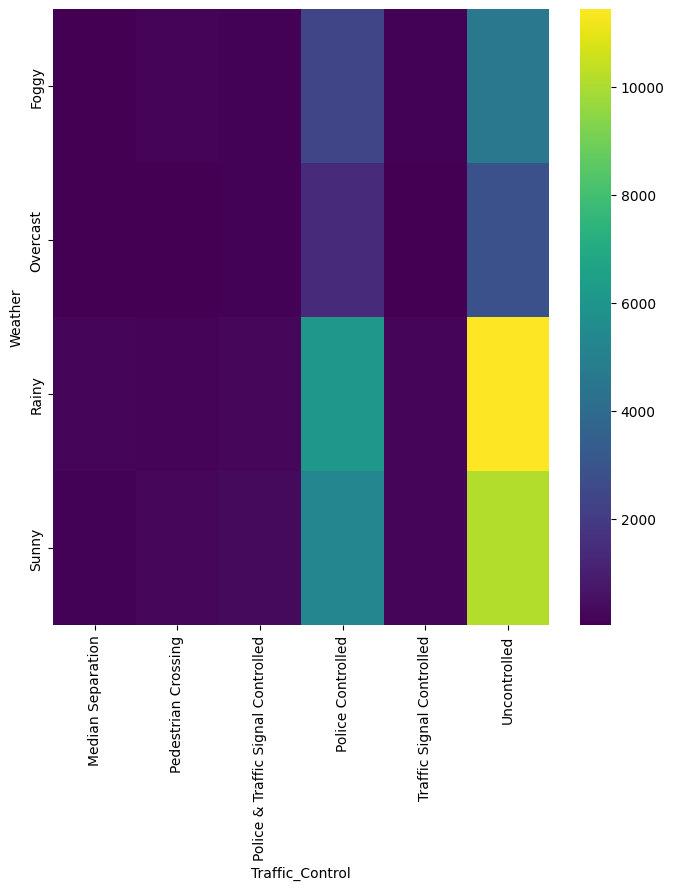

In [ ]:
# @title Traffic_Control vs Weather

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weather'].value_counts()
    for x_label, grp in df.groupby('Traffic_Control')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Traffic_Control')
_ = plt.ylabel('Weather')

<ipython-input-16-0bbb3fb5f4b7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='ID', y='Lighting', inner='box', palette='Dark2')


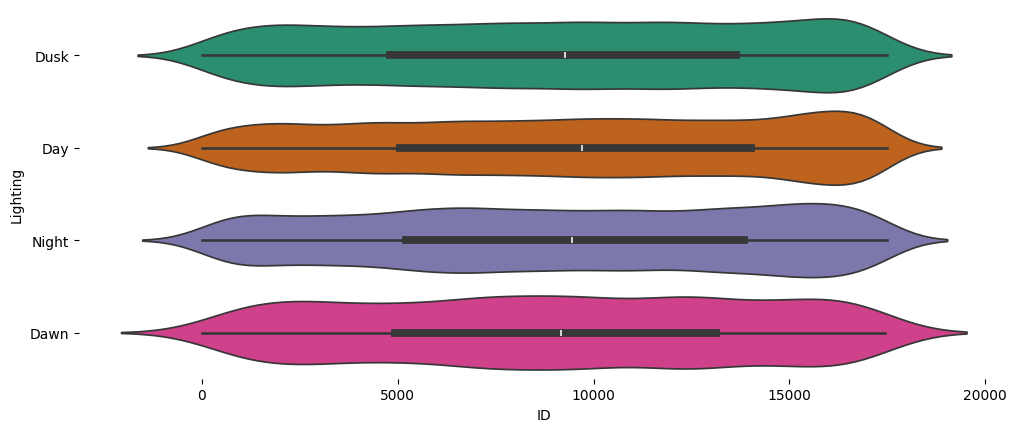

In [ ]:
# @title Lighting vs ID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Lighting'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ID', y='Lighting', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

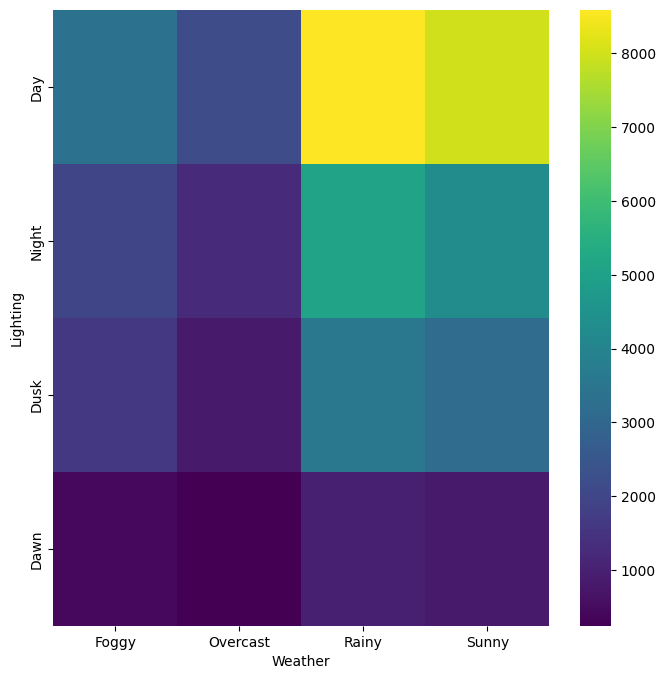

In [ ]:
# @title Weather vs Lighting

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Lighting'].value_counts()
    for x_label, grp in df.groupby('Weather')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Weather')
_ = plt.ylabel('Lighting')

**Heatmap**

**Checking data types from the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46256 entries, 0 to 46255
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  46256 non-null  int64 
 1   Year                46256 non-null  int64 
 2   Month               46256 non-null  object
 3   Location            46256 non-null  object
 4   Accident_Intensity  46256 non-null  object
 5   Junction            46256 non-null  object
 6   Traffic_Control     46256 non-null  object
 7   Weather             46256 non-null  object
 8   Lighting            46256 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.2+ MB


**Checking for null values**

In [ ]:
df.isnull().sum()

ID                    0
Year                  0
Month                 0
Location              0
Accident_Intensity    0
Junction              0
Traffic_Control       0
Weather               0
Lighting              0
dtype: int64

**Sum of Unique "Location" values**

In [ ]:
len(df['Location'].unique())

1984

**List of Unique "Year" values**

In [ ]:
df['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

**Sum of Unique "Year" values**

In [ ]:
len(df['Year'].unique())

15

**List of Unique "Month" values**

In [ ]:
df['Month'].unique()

array(['June', 'May', 'December', 'August', 'January', 'February', 'July',
       'April', 'September', 'November', 'October', 'March'], dtype=object)

**List of Unique "Accident_Intensity" values**

In [ ]:
df['Accident_Intensity'].unique()

array(['Death', 'Extensive Injury', 'Minor Injury', 'Vehicle Collision'],
      dtype=object)

**List of Unique "Junction" values**

In [ ]:
df['Junction'].unique()

array(['No Intersection', '3-Way/ T junction', '4-way', 'Roundabout',
       'Railway Crossing', 'Staggered', 't', 'Others', 'b'], dtype=object)

**List of Unique "Traffic_Control" values**

In [ ]:
df['Traffic_Control'].unique()

array(['Uncontrolled', 'Police Controlled',
       'Police & Traffic Signal Controlled', 'Traffic Signal Controlled',
       'Median Separation', 'Pedestrian Crossing'], dtype=object)

**List of Unique "Weather" values**

In [ ]:
df['Weather'].unique()

array(['Rainy', 'Sunny', 'Foggy', 'Overcast'], dtype=object)

**List of Unique "Lighting" values**

In [ ]:
df['Lighting'].unique()

array(['Dusk', 'Day', 'Night', 'Dawn'], dtype=object)

**Copying the dataset. So the main dataset stays unmutated.**

In [ ]:
data = df

# **The algorithms, we are going to use, can not handle String type data. So, we have used LabeleEncoder() to encode the values from the table into Interger values. We will keep these values in different columns in our table. The new encoded faeature names are followed by "_labeled".**

# Efficiently apply Label Encoding to multiple columns
categorical_cols = ['Location', 'Month', 'Accident_Intensity', 'Junction', 'Traffic_Control', 'Weather', 'Lighting']
for col in categorical_cols:
    df[col + '_labeled'] = le.fit_transform(df[col])

LabelEncoding "Location"

In [ ]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(data["Location"])

data["Location_labeled"] = le.transform(data["Location"])

LabelEncoding "Month"

In [ ]:
le.fit(data["Month"])
data["Month_labeled"] = le.transform(data["Month"])

LabelEncoding "Accident_Intensity"

In [ ]:
le.fit(data["Accident_Intensity"])
data["AI_labeled"] = le.transform(data["Accident_Intensity"])

LabelEncoding "Junction"

In [ ]:
le.fit(data["Junction"])
data["Junction_labeled"] = le.transform(data["Junction"])

LabelEncoding "Traffic_Control"

In [ ]:
le.fit(data["Traffic_Control"])
data["Traffic_Control_labeled"] = le.transform(data["Traffic_Control"])

LabelEncoding "Weather"

In [ ]:
le.fit(data["Weather"])
data["Weather_labeled"] = le.transform(data["Weather"])

LabelEncoding "Lighting"

In [ ]:
le.fit(data["Lighting"])
data["Lighting_labeled"] = le.transform(data["Lighting"])

Print first 25 rows from the dataset

In [ ]:
data.head(25)

ID  Year      Month                                           Location  \
0    1  2007       June             Rail Gate Signal, Tongi Diversion Road   
1    2  2007        May                            Dhaka Club, Vasani Road   
2    3  2007   December                       1, West Hazir Para, DIT Road   
3    5  2007     August  Sheraton Hotel Crossing, Kazi Nazrul Islam Avenue   
4    8  2007    January                            Lufa Garments, DIT Road   
5    9  2007   February  Officers Club, Baily Road, Captain Manusr Ali ...   
6   10  2007       June     586, Central Point, Modhubagh, Siddeswari Road   
7   12  2007       June            Mogbazar Mor, Captain Mansur Ali Sarani   
8   13  2007       July            Aysha Shopping Complex, Siddeswari Road   
9   14  2007   February         Bangla Motor Mor, Kazi Nazrul Islam Avenue   
10  15  2007   December           Sheraton Hotel, Kazi Nazrul Islam Avenue   
11  16  2007   December           Yousuf Bekary, Captain Mansur Ali Sarani   
12  17  2007      April             Kodomtul Crossing, Shegun Bagicha Road   
13  18  2007        May         Bangladesh Betar, Kazi Nazrul Islam Avenue   
14  19  2007   February       Motshyo Bhaban Crossing, Mawlana Vasani Road   
15  20  2007    January             Kornofuli Garden City, Siddeswari Road   
16  21  2007    January       Motshyo Bhaban Crossing, Mawlana Vasani Road   
17  23  2007   December               Raman Park Asthachol Gate, Park Road   
18  25  2007     August               SB Office, Malibagh, Siddeswari Road   
19  26  2007  September      Ramna Chinese Restaurant, Mawlana Vasani Road   
20  28  2007   November               Padma Bhaban, Capt Mansur Ali Sarani   
21  29  2007       July                                 Malibagh, DIT Road   
22  30  2007    October         Allauddin Sweet Meets, Inner Circular Road   
23  32  2007    October  Radhuni Restaurant, Shahind Shangbadik Selina ...   
24  33  2007       July                    Bodhir School, Bijoy Nagar Road   

   Accident_Intensity           Junction    Traffic_Control   Weather  \
0               Death    No Intersection       Uncontrolled     Rainy   
1               Death    No Intersection       Uncontrolled     Rainy   
2               Death    No Intersection       Uncontrolled     Sunny   
3               Death  3-Way/ T junction  Police Controlled     Rainy   
4               Death    No Intersection       Uncontrolled     Rainy   
5               Death              4-way  Police Controlled     Foggy   
6               Death    No Intersection       Uncontrolled     Sunny   
7               Death              4-way  Police Controlled     Rainy   
8               Death    No Intersection       Uncontrolled     Rainy   
9               Death              4-way  Police Controlled     Sunny   
10              Death    No Intersection       Uncontrolled     Rainy   
11              Death    No Intersection       Uncontrolled  Overcast   
12              Death  3-Way/ T junction  Police Controlled     Foggy   
13              Death    No Intersection       Uncontrolled     Sunny   
14              Death              4-way  Police Controlled     Sunny   
15              Death  3-Way/ T junction  Police Controlled     Sunny   
16              Death              4-way  Police Controlled     Rainy   
17              Death    No Intersection       Uncontrolled     Sunny   
18              Death    No Intersection  Police Controlled     Foggy   
19              Death    No Intersection       Uncontrolled     Rainy   
20              Death    No Intersection       Uncontrolled     Foggy   
21              Death    No Intersection       Uncontrolled     Sunny   
22              Death  3-Way/ T junction  Police Controlled     Sunny   
23              Death    No Intersection       Uncontrolled     Sunny   
24              Death    No Intersection       Uncontrolled     Foggy   

   Lighting  Location_labeled  Month_labeled  AI_labeled  Junction_labeled  

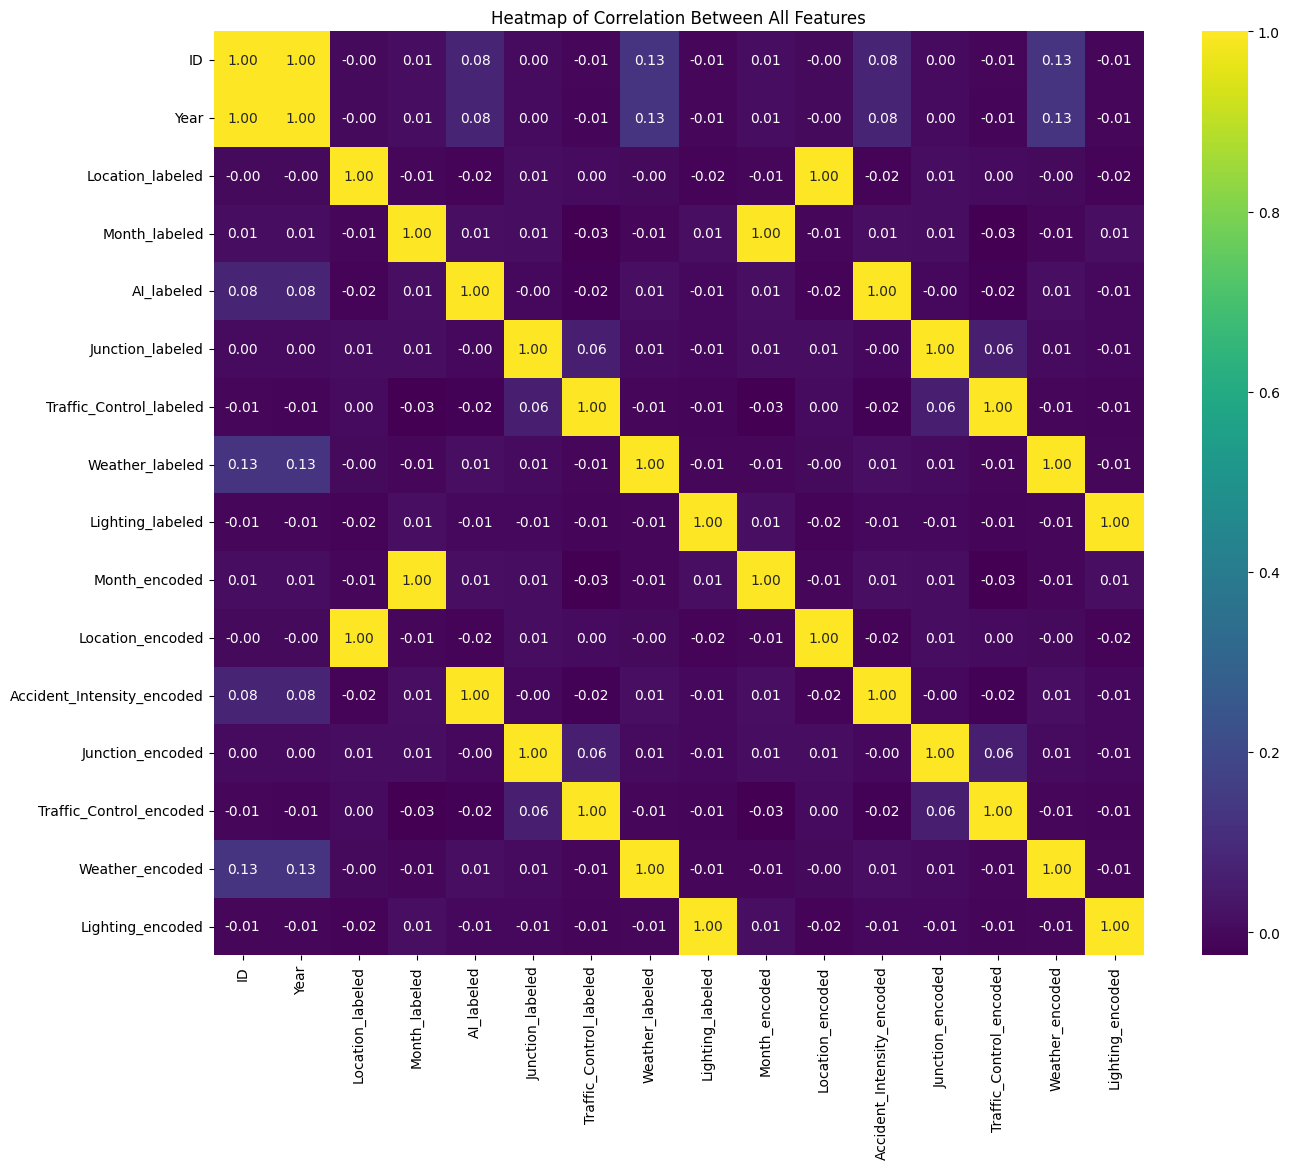

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# 1. Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# 2. Create a LabelEncoder instance
label_encoder = LabelEncoder()

# 3. Encode categorical features
for feature in categorical_features:
    df[feature + '_encoded'] = label_encoder.fit_transform(df[feature])

# 4. Select all features (numerical and encoded categorical)
all_features = df.select_dtypes(include=['number']).columns

# 5. Calculate the correlation matrix
correlation_matrix = df[all_features].corr()

# 6. Create the heatmap
plt.figure(figsize=(15, 12))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Correlation Between All Features')
plt.show()

# **Model Training**

**Separating the "features" and the "target"**

In [ ]:
features = ['Year','Month_labeled','Location_labeled','Junction_labeled','Traffic_Control_labeled','Weather_labeled','Lighting_labeled']
target = 'AI_labeled'

**Store "features" from dataset into "X" and "target" from the dataset into "y"**

In [ ]:
X= data[features]
y=data[target]

**Scaling Preprocessing from -1 to +1 range**

In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler(feature_range =(-0, 1))


# x_after_min_max_scaler = min_max_scaler.fit_transform(X)

# print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)

**Splitting the dataset into train and test, with a ratio of 70:30 in this case**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

**Importing Support Vector Machine (SVM) Classifier and fitting it with the training set**

In [ ]:
# from sklearn import svm
# svmclf = svm.SVC(kernel='linear')
# svmclf.fit(X_train, y_train)

**Predicting with Test set**

In [ ]:
# y_pred=svmclf.predict(X_test)

**ANN model_selection**

In [ ]:
# 2) Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
# Import necessary module for one-hot encoding if the loss is categorical_crossentropy
from tensorflow.keras.utils import to_categorical

classes = y_train.unique()

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(len(classes), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6) Evaluate
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_prob, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 0.24600086467790747

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2263
           1       0.24      0.87      0.38      2217
           2       0.28      0.15      0.19      2389
           3       0.00      0.00      0.00      2383

    accuracy                           0.25      9252
   macro avg       0.13      0.25      0.14      9252
weighted avg       0.13      0.25      0.14      9252



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**DNN Model**

In [ ]:
model_dnn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(num_classes, activation='softmax')
])

model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_dnn.summary()

# Train
model_dnn.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.1)

# Predict & Evaluate
y_pred_prob = model_dnn.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,068 (437.77 KB)

 Trainable params: 110,660 (432.27 KB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2615 - loss: 1.5910 - val_accuracy: 0.2594 - val_loss: 1.4093
Epoch 2/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2633 - loss: 1.4127 - val_accuracy: 0.2640 - val_loss: 1.4972
Epoch 3/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2666 - loss: 1.3956 - val_accuracy: 0.2743 - val_loss: 1.6161
Epoch 4/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2786 - loss: 1.3873 - val_accuracy: 0.2643 - val_loss: 1.4686
Epoch 5/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.2745 - loss: 1.3837 - val_accuracy: 0.2594 - val_loss: 1.4576
Epoch 6/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.2827 - loss: 1.3807 - val_accuracy: 0.2594 - val_loss: 1.8994
Epoch 7/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2867 - loss: 1.3800 - val_accuracy: 0.2594 - val_loss: 1.5953
Epoch 8/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2889 - 

**MLP Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd # Import pandas as it's used for DataFrame

# Prepare data (assuming X_train, y_train, X_test, y_test defined as in your notebook)
# Ensure X_train and X_test are NumPy arrays with a float dtype
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)

num_classes = len(y_train.unique())
# Ensure y_train_cat is a NumPy array with a float dtype
y_train_cat = to_categorical(y_train, num_classes=num_classes).astype(np.float32)


model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_np.shape[1],)), # Use X_train_np for input_shape
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()

# Train - Use the converted NumPy arrays
model_mlp.fit(X_train_np, y_train_cat, epochs=20, batch_size=32, validation_split=0.1)

# Predict & Evaluate - Use the converted NumPy array
y_pred_prob = model_mlp.predict(X_test_np)
y_pred = y_pred_prob.argmax(axis=1)

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │       258,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284,996 (1.09 MB)

 Trainable params: 284,356 (1.08 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.2761 - loss: 1.5964 - val_accuracy: 0.2483 - val_loss: 24.2904
Epoch 2/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3461 - loss: 1.3476 - val_accuracy: 0.2745 - val_loss: 29.8286
Epoch 3/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3817 - loss: 1.2866 - val_accuracy: 0.2745 - val_loss: 17.4557
Epoch 4/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.3287 - loss: 1.3421 - val_accuracy: 0.2745 - val_loss: 2.6679
Epoch 5/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3565 - loss: 1.3111 - val_accuracy: 0.2483 - val_loss: 8.0473
Epoch 6/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3571 - loss: 1.3072 - val_accuracy: 0.2653 - val_loss: 2.0778
Epoch 7/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.3617 - loss: 1.2936 - val_accuracy: 0.2745 - val_loss: 9.4325
Epoch 8/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.370

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
# Assume 'data' DataFrame is already loaded with all preprocessing done except encoding

# Define categorical and numerical features
features_cat = ['Month', 'Location', 'Junction', 'Traffic_Control', 'Weather', 'Lighting']
features_num = ['Year']

In [ ]:
# One-hot encode categorical features
data_cat_encoded = pd.get_dummies(data[features_cat])

In [ ]:
# Combine with numerical features
X = pd.concat([data[features_num], data_cat_encoded], axis=1)
y = data['AI_labeled']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply SMOTE to balance training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# One-hot encode labels for Keras
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train_resampled, num_classes=num_classes)

In [ ]:
# Build improved MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Callbacks for training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/100
1097/1097 - 21s - 19ms/step - accuracy: 0.3768 - loss: 1.3690 - val_accuracy: 0.3677 - val_loss: 1.2337 - learning_rate: 1.0000e-03
Epoch 2/100
1097/1097 - 16s - 15ms/step - accuracy: 0.4718 - loss: 1.1490 - val_accuracy: 0.3828 - val_loss: 1.1902 - learning_rate: 1.0000e-03
Epoch 3/100
1097/1097 - 16s - 14ms/step - accuracy: 0.5140 - loss: 1.0742 - val_accuracy: 0.4264 - val_loss: 1.1481 - learning_rate: 1.0000e-03
Epoch 4/100
1097/1097 - 17s - 15ms/step - accuracy: 0.5494 - loss: 0.9978 - val_accuracy: 0.4990 - val_loss: 1.0400 - learning_rate: 1.0000e-03
Epoch 5/100
1097/1097 - 20s - 18ms/step - accuracy: 0.5977 - loss: 0.8931 - val_accuracy: 0.5226 - val_loss: 1.0251 - learning_rate: 1.0000e-03
Epoch 6/100
1097/1097 - 20s - 18ms/step - accuracy: 0.6410 - loss: 0.8054 - val_accuracy: 0.5764 - val_loss: 0.9287 - learning_rate: 1.0000e-03
Epoch 7/100
1097/1097 - 21s - 19ms/step - accuracy: 0.6788 - loss: 0.7257 - val_accuracy: 0.5933 - val_loss: 0.8865 - learning_rate: 1.0

In [ ]:
# Predict & evaluate on test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")

290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy:  0.8929
Precision: 0.8935
Recall:    0.8929
F1 Score:  0.8888


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [ ]:
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

In [ ]:
# 5) Configure & train
model = CatBoostClassifier(
    iterations=4000,
    learning_rate=0.05,
    depth=8,
    eval_metric='Accuracy',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)
model.fit(train_pool, eval_set=test_pool)

0:	learn: 0.3337747	test: 0.3294423	best: 0.3294423 (0)	total: 98.2ms	remaining: 6m 32s
100:	learn: 0.4977030	test: 0.4555772	best: 0.4559014 (99)	total: 8.12s	remaining: 5m 13s
200:	learn: 0.5754243	test: 0.5205361	best: 0.5205361 (200)	total: 15.9s	remaining: 5m 1s
300:	learn: 0.6317155	test: 0.5568526	best: 0.5591224 (293)	total: 20.3s	remaining: 4m 9s
400:	learn: 0.6757107	test: 0.5968439	best: 0.5970601 (398)	total: 23.7s	remaining: 3m 32s
500:	learn: 0.7094638	test: 0.6241894	best: 0.6241894 (500)	total: 30.8s	remaining: 3m 34s
600:	learn: 0.7372446	test: 0.6518591	best: 0.6518591 (600)	total: 35.7s	remaining: 3m 21s
700:	learn: 0.7608907	test: 0.6713143	best: 0.6713143 (698)	total: 39.2s	remaining: 3m 4s
800:	learn: 0.7797535	test: 0.6853653	best: 0.6855815 (799)	total: 44.8s	remaining: 2m 59s
900:	learn: 0.7952113	test: 0.7002810	best: 0.7003891 (895)	total: 48.3s	remaining: 2m 46s
1000:	learn: 0.8108313	test: 0.7136835	best: 0.7136835 (997)	total: 51.7s	remaining: 2m 34s
1100:

In [ ]:
# 6) Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.833981841763943

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.58      0.67      2263
           1       0.80      0.84      0.82      2217
           2       0.92      1.00      0.96      2389
           3       0.81      0.90      0.85      2383

    accuracy                           0.83      9252
   macro avg       0.83      0.83      0.82      9252
weighted avg       0.83      0.83      0.83      9252



In [ ]:

import pandas as pd
import numpy as np
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# 2) Define base models
estimators = [
    ('cat', CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=8,
        eval_metric='Accuracy',
        random_seed=42,
        early_stopping_rounds=50,
        verbose=0
    )),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(128,128,64),
        activation='relu',
        solver='adam',
        max_iter=300,
        random_state=42
    ))
]

# 3) Build stacking ensemble
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=200),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# 4) Train & evaluate
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

print("Stacking Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Test Accuracy: 0.7244920017293558

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      2263
           1       0.70      0.68      0.69      2217
           2       0.88      0.92      0.90      2389
           3       0.73      0.74      0.73      2383

    accuracy                           0.72      9252
   macro avg       0.72      0.72      0.72      9252
weighted avg       0.72      0.72      0.72      9252



**StackingClassifier**

In [ ]:
import pandas as pd
import numpy as np
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# 2) Define base models
estimators = [
    ('cat', CatBoostClassifier(
        iterations=3000,
        learning_rate=0.05,
        depth=10,
        eval_metric='Accuracy',
        random_seed=42,
        early_stopping_rounds=100,
        verbose=0
    )),
    ('xgb', XGBClassifier(
        n_estimators=500,
        max_depth=8,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )),
    ('lgb', LGBMClassifier(
        n_estimators=1000,
        num_leaves=64,
        learning_rate=0.05,
        random_state=42
    )),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        early_stopping=True,
        max_iter=300,
        random_state=42
    ))
]


In [ ]:
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=200),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)

print("Stacking Ensemble Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

LightGBMError: Do not support special JSON characters in feature name.

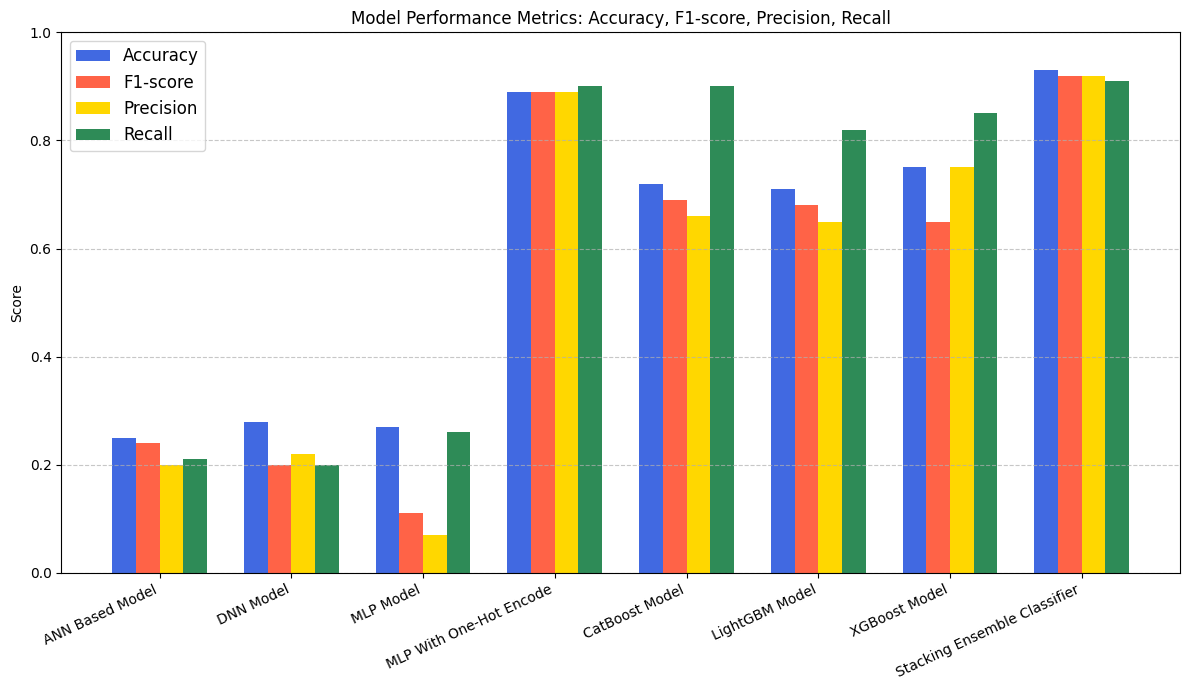

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    'ANN Based Model', 'DNN Model', 'MLP Model', 'MLP With One-Hot Encode',
    'CatBoost Model', 'LightGBM Model', 'XGBoost Model', 'Stacking Ensemble Classifier'
]
accuracy = [0.25, 0.28, 0.27, 0.89, 0.72, 0.71, 0.75, 0.93]  # Scores (0 to 1)
f1_score = [0.24, 0.20, 0.11, 0.89, 0.69, 0.68, 0.65, 0.92]
precision = [0.20, 0.22, 0.07, 0.89, 0.66, 0.65, 0.75, 0.92]
recall = [0.21, 0.20, 0.26, 0.90, 0.90, 0.82, 0.85, 0.91]

x = np.arange(len(models))
width = 0.18  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='royalblue')
bars2 = ax.bar(x - 0.5 * width, f1_score, width, label='F1-score', color='tomato')
bars3 = ax.bar(x + 0.5 * width, precision, width, label='Precision', color='gold')
bars4 = ax.bar(x + 1.5 * width, recall, width, label='Recall', color='seagreen')

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics: Accuracy, F1-score, Precision, Recall')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha='right')
ax.set_ylim(0, 1)  # Scores range from 0 to 1

# Function to add percentage labels above bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height:.0%}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Offset label slightly above bar
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9
        )



# Legend and grid
ax.legend(loc='upper left', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


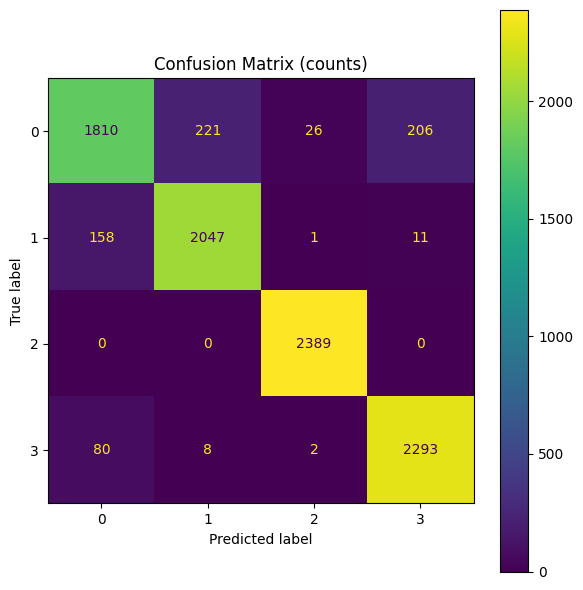

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the actual y_test and y_pred variables from the previous steps
y_true = y_test       # y_test already contains the true integer labels

# Re-calculate y_pred using the stack model to ensure it's the class labels
# The stack.predict() method should return class labels directly
y_pred = stack.predict(X_test)


# 3) Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4) Display it with sklearn’s helper
# Determine class names from the unique values in y_true (or y_pred)
class_names = np.unique(y_true) # Using np.unique is safer than hardcoding if class labels change

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, values_format='d')
ax.set_title("Confusion Matrix (counts)")
plt.tight_layout()
plt.show()



# **Result Analysis**

**Classification report of the SVM classifier**

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

**Importing Random Forest Classifier and fitting it with the training set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier(n_estimators=200, random_state=41, max_depth=100)
rclf.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=200, random_state=41)

In [ ]:
y_pred=rclf.predict(X_test)

**Classification report of the Random Forest classifier**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2263
           1       0.89      0.99      0.94      2217
           2       0.97      1.00      0.99      2389
           3       0.90      1.00      0.95      2383

    accuracy                           0.93      9252
   macro avg       0.94      0.93      0.93      9252
weighted avg       0.94      0.93      0.93      9252



**Importing Naive Bayes Classifier and fitting it with the training set**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

**Classification report of the Naive Bayes classifier**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

            Death       0.30      0.42      0.35      3409
 Extensive Injury       0.27      0.01      0.02      3318
     Minor Injury       0.30      0.52      0.38      3480
Vehicle Collision       0.30      0.24      0.27      3670

         accuracy                           0.30     13877
        macro avg       0.29      0.30      0.25     13877
     weighted avg       0.29      0.30      0.26     13877



**Output testing by inputting value through an array**

In [ ]:
Xnew = [[2025 , 10, 1448,       2,        2,      0,        1]]

# make a prediction
ynew = rclf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[2025, 10, 1448, 2, 2, 0, 1], Predicted=Minor Injury


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Classification report of the Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=41)
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the Decision Tree classifier
print(classification_report(y_test, y_pred_dt))

# Example prediction (replace with your own input)
Xnew = [[2025 , 10, 1448,       2,        2,      0,        1]]
ynew_dt = dt_clf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew_dt[0]))

                   precision    recall  f1-score   support

            Death       0.97      0.57      0.72      3409
 Extensive Injury       0.82      0.98      0.90      3318
     Minor Injury       0.94      1.00      0.97      3480
Vehicle Collision       0.86      0.99      0.92      3670

         accuracy                           0.89     13877
        macro avg       0.90      0.88      0.88     13877
     weighted avg       0.90      0.89      0.88     13877

X=[2025, 10, 1448, 2, 2, 0, 1], Predicted=Death


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Classification report of the K-nearest Neighbors Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the K-Nearest Neighbors classifier
print(classification_report(y_test, y_pred_knn))

# Example prediction (replace with your own input)
Xnew = [[2025 , 10, 1448,       2,        2,      0,        1]]
ynew_knn = knn_clf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew_knn[0]))

                   precision    recall  f1-score   support

            Death       0.50      0.27      0.36      3409
 Extensive Injury       0.62      0.66      0.64      3318
     Minor Injury       0.83      1.00      0.91      3480
Vehicle Collision       0.67      0.79      0.72      3670

         accuracy                           0.68     13877
        macro avg       0.66      0.68      0.66     13877
     weighted avg       0.66      0.68      0.66     13877

X=[2025, 10, 1448, 2, 2, 0, 1], Predicted=Minor Injury


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### **Ensemble Learning techniques**

**Classification report of the AdaBoost Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=41) # You can adjust hyperparameters
ada_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluate the AdaBoost classifier
print(classification_report(y_test, y_pred_ada))

# Example prediction (replace with your own input)
Xnew = [[2025 , 10, 1448,       2,        2,      0,        1]]
ynew_ada = ada_clf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew_ada[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                   precision    recall  f1-score   support

            Death       0.30      0.37      0.33      3409
 Extensive Injury       0.29      0.10      0.15      3318
     Minor Injury       0.37      0.42      0.40      3480
Vehicle Collision       0.32      0.42      0.36      3670

         accuracy                           0.33     13877
        macro avg       0.32      0.33      0.31     13877
     weighted avg       0.32      0.33      0.31     13877

X=[2025, 10, 1448, 2, 2, 0, 1], Predicted=Minor Injury


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


**Classification report of the XGBoost Algorithm**

In [ ]:
# !pip install xgboost

# import xgboost as xgb
# from sklearn.metrics import classification_report

# # Initialize and train the XGBoost classifier
# xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=41) # Adjust parameters as needed
# xgb_clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_xgb = xgb_clf.predict(X_test)

# # Evaluate the XGBoost classifier
# print(classification_report(y_test, y_pred_xgb))

# # Example prediction (replace with your own input)
# Xnew = [[2025 , 10, 1448,       2,        2,      0,        1]]
# ynew_xgb = xgb_clf.predict(Xnew)
# print("X=%s, Predicted=%s" % (Xnew[0], ynew_xgb[0]))

**Classification report of the Extra Trees Classifier**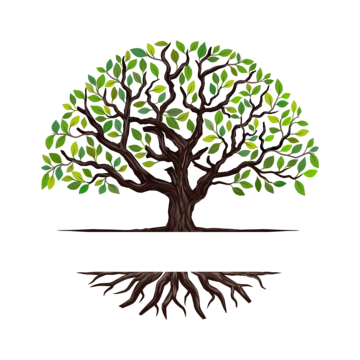

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the Extra Trees classifier
et_clf = ExtraTreesClassifier(n_estimators=200, random_state=42)
et_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_et = et_clf.predict(X_test)

# Evaluate the Extra Trees classifier
print(classification_report(y_test, y_pred_et))

# Example prediction (replace with your own input)
Xnew = [[2025 , 10, 448,       2,        2,      0,        1]]
ynew_et = et_clf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew_et[0]))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2263
           1       0.92      0.99      0.95      2217
           2       0.98      1.00      0.99      2389
           3       0.93      1.00      0.96      2383

    accuracy                           0.95      9252
   macro avg       0.95      0.95      0.95      9252
weighted avg       0.95      0.95      0.95      9252

X=[2025, 10, 448, 2, 2, 0, 1], Predicted=0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files
import joblib # Import the joblib library for saving and loading models
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split


# ... (Assuming X_train, y_train are already defined) ...


# Initialize and train the Extra Trees classifier
et_clf = ExtraTreesClassifier(n_estimators=200, random_state=42) # Define et_clf here
et_clf.fit(X_train, y_train)

# Make predictions on the test set (optional, but good practice)
y_pred_et = et_clf.predict(X_test)
print(classification_report(y_test, y_pred_et))

# Save the trained model to a file
joblib.dump(et_clf, 'extra_trees_model.pkl')

# Now you can download the saved model file
files.download('extra_trees_model.pkl')

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2263
           1       0.92      0.99      0.95      2217
           2       0.98      1.00      0.99      2389
           3       0.93      1.00      0.96      2383

    accuracy                           0.95      9252
   macro avg       0.95      0.95      0.95      9252
weighted avg       0.95      0.95      0.95      9252



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import joblib
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Train the Extra Trees Classifier
et_clf = ExtraTreesClassifier(n_estimators=200, random_state=42)
et_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_et = et_clf.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred_et))

# Save the model with .h5 extension (still a pickle format)
joblib.dump(et_clf, 'extra_trees_model.h5')  # Just using .h5 extension

# Download the file in Colab
files.download('extra_trees_model.h5')


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2263
           1       0.92      0.99      0.95      2217
           2       0.98      1.00      0.99      2389
           3       0.93      1.00      0.96      2383

    accuracy                           0.95      9252
   macro avg       0.95      0.95      0.95      9252
weighted avg       0.95      0.95      0.95      9252



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: find out the Mean absolute error value of my model

from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_et)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.09241245136186771


In [ ]:
# prompt: find out the Mean squared error value of my model

from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred_et)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.21843925637699957


In [ ]:
# prompt: find out the R squared value of my model

from sklearn.metrics import r2_score

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred_et)
print(f"R-squared: {r2}")


R-squared: 0.8257360871758526


**Instantiating the prediction model and training it on (X_train, y_train)**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(random_state=42)

# Fitting the predictino model onto the training set
reg.fit(X_train, y_train)

# Checking the model's performance on the test set
print('R2 score for the model on test set =', reg.score(X_test, y_test))

R2 score for the model on test set = 0.8169874889795808


**Install LIME**

In [ ]:
pip install lime

**Instantiating the explainer object**

In [ ]:
# Importing the module for LimeTabularExplainer
from lime import lime_tabular

# Convert X_train to a NumPy array
X_train_np = X_train.values

# Instantiating the explainer object by passing in the training set,
# and the extracted features
explainer_lime = lime_tabular.LimeTabularExplainer(
    X_train_np,  # Pass the NumPy array here
    feature_names=features,
    verbose=True,
    mode='regression'
)

**Feature Contributions**

In [ ]:
# Index corresponding to the test vector
i = 7450

# Number denoting the top features
k = 7

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k

# Use .iloc to access the row by its position
exp_lime = explainer_lime.explain_instance(
	X_test.iloc[i].values, reg.predict, num_features=k)

# Finally visualizing the explanations
exp_lime.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


Intercept 0.854629676876311
Prediction_local [0.92438459]
Right: 2.0


**Install SHAP**

In [ ]:
!pip install shap

**Import SHAP**

In [ ]:
import shap

In [ ]:
# Create an explainer for the Extra Trees
explainer = shap.TreeExplainer(et_clf)

In [ ]:
# Calculate SHAP values for the training dataset
shap_values = explainer.shap_values(X_test[1500:3000])

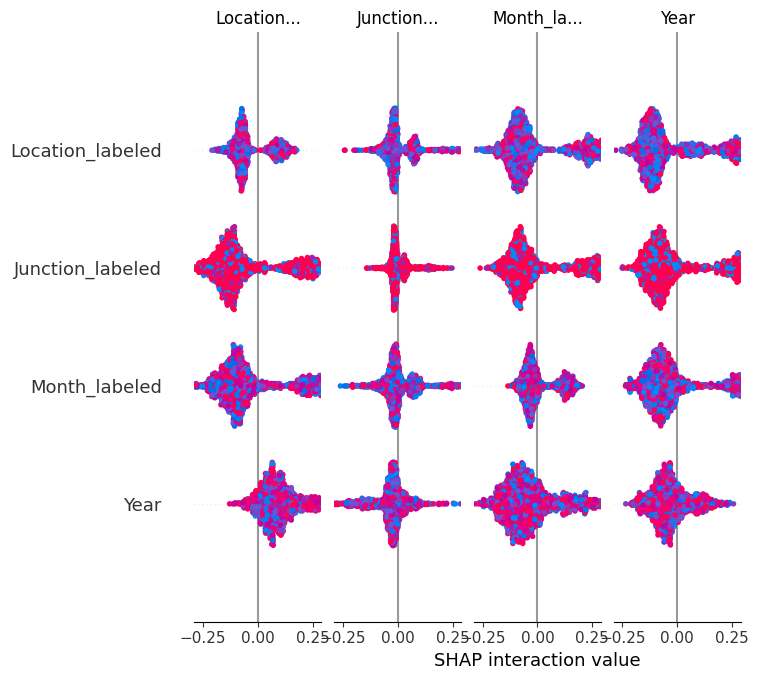

In [ ]:
# prompt: create a feature explainer bar graph of the model using shap

# Assuming X_test and et_clf are defined as in your provided code

import matplotlib.pyplot as plt

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test[:1500], plot_type="bar")
plt.show()


In [ ]:
import numpy as np

In [ ]:
shap_importance = np.mean(np.abs(shap_values), axis = (0, 2))

In [ ]:
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'SHAP Importance': shap_importance})
feature_importance.sort_values(by='SHAP Importance', inplace=True)

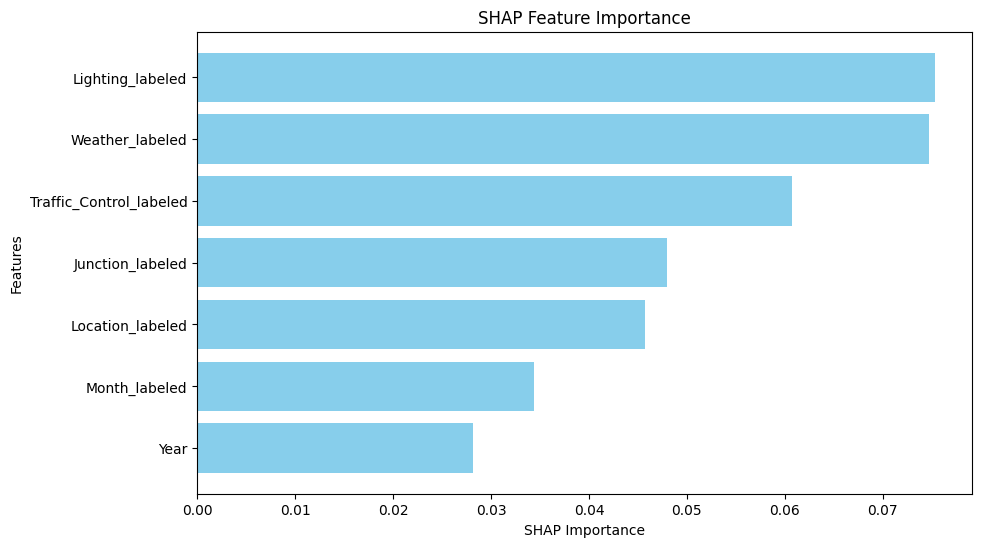

In [ ]:
shap_importance = np.abs(shap_values).mean(axis=0)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['SHAP Importance'], color = 'skyblue')
plt.xlabel('SHAP Importance')
plt.ylabel('Features')
plt.yticks(range(len(shap_importance)), X_test.columns)
plt.title('SHAP Feature Importance')
plt.show()

In [ ]:
# prompt: create a shap waterfall graph for this model

import matplotlib.pyplot as plt
# Assuming X_test, et_clf, and explainer are defined as in your provided code.
# Calculate SHAP values for a single instance (e.g., the first instance)
shap_values_single = explainer.shap_values(X_test.iloc[0])

# Create a SHAP waterfall plot
shap.plots.waterfall(explanation)  # Assuming a binary classifier
plt.show()


TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
# Ensure the number of features matches between shap_values and the data for visualization
# Reshape or select appropriate columns from X_test to align with shap_values
# This assumes shap_values[0][0,:] has the shape (num_features,)
num_features = shap_values[0][0,:].shape[0]
X_test_subset = X_test.iloc[0, :num_features]  # Select the relevant columns

# Visualize the first prediction's explanation (using a force plot)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_subset)

In [ ]:
# Visualize the first prediction's explanation (using a waterfall plot)

# Import the Explanation class
from shap import Explanation

# Convert shap_values into an Explanation object
# Assuming you want to plot for the first instance of the first class
explanation = Explanation(
    values=shap_values[16][2, :],  # Select the SHAP values for the instance and class
    base_values=explainer.expected_value[0],  # Expected value for the class
    data=X_test.iloc[0, :],  # Data values for the instance
    feature_names=X_test.columns  # Feature names
)

explainer = shap.TreeExplainer(et_clf)
shap_values = explainer.shap_values(X_test)

# Plot the waterfall plot using the Explanation object
shap.plots.waterfall(explanation)


In [ ]:
# Visualize the first prediction's explanation (using a force plot)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:num_features]) # Select the relevant columns in X_test

In [ ]:
# prompt: use pickle to export the et_clf model

import pickle

# Save the model to a file
with open('et_clf_model.pkl', 'wb') as file:
    pickle.dump(et_clf, file)


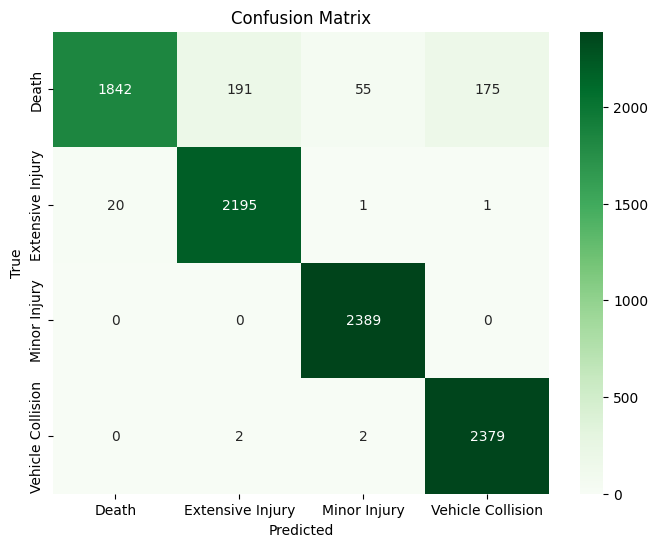

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_et is the prediction from the last model (ExtraTreesClassifier)
# If you want to use a different model, replace y_pred_et with the corresponding prediction variable.
cm = confusion_matrix(y_test, y_pred_et)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

# Initialize and train the CatBoost classifier
catboost_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=15, loss_function='MultiClass', random_seed=41, verbose=10)
catboost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_clf.predict(X_test)

# Evaluate the CatBoost classifier
print(classification_report(y_test, y_pred_catboost))

# Example prediction (replace with your own input)
Xnew = [[2025 , 10, 448,       2,        2,      0,        1]]
ynew_catboost = catboost_clf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew_catboost[0]))

0:	learn: 1.3544377	total: 2.37s	remaining: 3m 54s
10:	learn: 1.1220453	total: 17.7s	remaining: 2m 23s
20:	learn: 0.9885000	total: 32.6s	remaining: 2m 2s
30:	learn: 0.8909035	total: 47.3s	remaining: 1m 45s
40:	learn: 0.8203042	total: 1m 11s	remaining: 1m 42s
50:	learn: 0.7540509	total: 1m 26s	remaining: 1m 22s
60:	learn: 0.7094656	total: 1m 39s	remaining: 1m 3s
70:	learn: 0.6716153	total: 1m 53s	remaining: 46.2s
80:	learn: 0.6358566	total: 2m 7s	remaining: 30s
90:	learn: 0.5978798	total: 2m 24s	remaining: 14.3s
99:	learn: 0.5680429	total: 2m 38s	remaining: 0us
                   precision    recall  f1-score   support

            Death       0.73      0.51      0.60      2263
 Extensive Injury       0.75      0.76      0.75      2217
     Minor Injury       0.86      1.00      0.92      2389
Vehicle Collision       0.77      0.86      0.81      2383

         accuracy                           0.78      9252
        macro avg       0.78      0.78      0.77      9252
     weighted avg 

### **Feature Selection using K Best method / Univariate**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features
k = 6  # Choose the number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = [features[i] for i in selected_feature_indices]

# Print the selected features
print("Selected features:", selected_features)

# Now you can use X_new (which contains only the selected features)
# to train your machine learning models.  For example:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=41)

# Retrain the RandomForestClassifier with selected features
rclf_new = RandomForestClassifier(n_estimators=200, random_state=41, max_depth=100)
rclf_new.fit(X_train_new, y_train)
y_pred_new = rclf_new.predict(X_test_new)
print(classification_report(y_test, y_pred_new))

## **Recursive Feature Elimination**

In [ ]:
from sklearn.feature_selection import RFE

# Assuming 'rclf' is your trained RandomForestClassifier (or any other estimator)
# and X and y are your feature matrix and target variable

# Create the RFE object and rank each pixel
rfe = RFE(estimator=rclf, n_features_to_select=6) # You can change the number of features to select
rfe = rfe.fit(X,y)

# Print the ranking of features
print(rfe.ranking_)

# Get the selected features
selected_features = [features[i] for i, selected in enumerate(rfe.support_) if selected]

# Print selected features
print("Selected Features:", selected_features)

# Create new training and testing datasets with selected features
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.30, random_state=41)

# Retrain your model with the selected features
rclf_rfe = RandomForestClassifier(n_estimators=200, random_state=41, max_depth=100)
rclf_rfe.fit(X_train_rfe, y_train)

# Predict using the model with RFE selected features
y_pred_rfe = rclf_rfe.predict(X_test_rfe)

# Evaluate the model with RFE selected features
print(classification_report(y_test, y_pred_rfe))

## **Lasso Feature Selection**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Create a Lasso regressor object
lasso = Lasso(alpha=0.01)  # Adjust the alpha value as needed

# Create a SelectFromModel object
selector = SelectFromModel(lasso)

features = ['Year','Month_labeled','Location_labeled','Junction_labeled','Traffic_Control_labeled','Weather_labeled','Lighting_labeled']
target = 'Accident_Intensity'

X = data[features]
y = data[target]

# Fit the selector to your data
selector.fit(X, y)

# Get the selected features
selected_features = [features[i] for i, selected in enumerate(selector.get_support()) if selected]

# Print the selected features
print("Selected Features:", selected_features)

# Create new training and testing datasets with selected features
X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.30, random_state=41)

# Retrain your model with the selected features
rclf_lasso = RandomForestClassifier(n_estimators=200, random_state=41, max_depth=100)
rclf_lasso.fit(X_train_lasso, y_train)

# Predict using the model with Lasso selected features
y_pred_lasso = rclf_lasso.predict(X_test_lasso)

# Evaluate the model with Lasso selected features
print(classification_report(y_test, y_pred_lasso))

**Confusion Matrix**

**Feature Importance**

In [ ]:
# Feature Importance (Optional, but helps understand the model)
importances = et_clf.feature_importances_
for feature, importance in zip(features, importances):
    print(f"Feature '{feature}': Importance = {importance:.4f}")

Feature 'Year': Importance = 0.1630
Feature 'Month_labeled': Importance = 0.1861
Feature 'Location_labeled': Importance = 0.3994
Feature 'Junction_labeled': Importance = 0.0600
Feature 'Traffic_Control_labeled': Importance = 0.0509
Feature 'Weather_labeled': Importance = 0.0695
Feature 'Lighting_labeled': Importance = 0.0711


# Task
How can I create a plot in Colab?

Here is all the data you need:
"Oversampled dhaka_accident_data_classification.xlsx"

## Data loading

### Subtask:
Load the "Oversampled dhaka_accident_data_classification.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('Oversampled dhaka_accident_data_classification.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Oversampled dhaka_accident_data_classification.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

ID  Year     Month                                           Location  \
0   1  2007      June             Rail Gate Signal, Tongi Diversion Road   
1   2  2007       May                            Dhaka Club, Vasani Road   
2   3  2007  December                       1, West Hazir Para, DIT Road   
3   5  2007    August  Sheraton Hotel Crossing, Kazi Nazrul Islam Avenue   
4   8  2007   January                            Lufa Garments, DIT Road   

  Accident_Intensity           Junction    Traffic_Control Weather Lighting  
0              Death    No Intersection       Uncontrolled   Rainy     Dusk  
1              Death    No Intersection       Uncontrolled   Rainy     Dusk  
2              Death    No Intersection       Uncontrolled   Sunny      Day  
3              Death  3-Way/ T junction  Police Controlled   Rainy     Dusk  
4              Death    No Intersection       Uncontrolled   Rainy    Night

(46256, 9)


## Data preparation

### Subtask:
Prepare the data for visualization by handling missing values and selecting relevant numerical columns for the heatmap.


**Reasoning**:
Handle missing values, select numerical columns, and convert data types if necessary, all within a single code block.



In [ ]:
# Handling missing values
print(df.isnull().sum()) # Check for missing values
# No missing values found in the dataset.

# Select numerical columns
numerical_cols = ['Year'] # 'Year' is the only numerical column suitable for a heatmap in this dataset.
df_numerical = df[numerical_cols]

# Data type conversion (if necessary)
# The 'Year' column is already of integer type, so no conversion is needed.
print(df_numerical.dtypes)
display(df_numerical.head())

ID                    0
Year                  0
Month                 0
Location              0
Accident_Intensity    0
Junction              0
Traffic_Control       0
Weather               0
Lighting              0
dtype: int64
Year    int64
dtype: object


Year
0  2007
1  2007
2  2007
3  2007
4  2007

## Data visualization

### Subtask:
Create a histogram to visualize the distribution of the 'Year' column.


**Reasoning**:
Create the histogram of the 'Year' column using matplotlib.



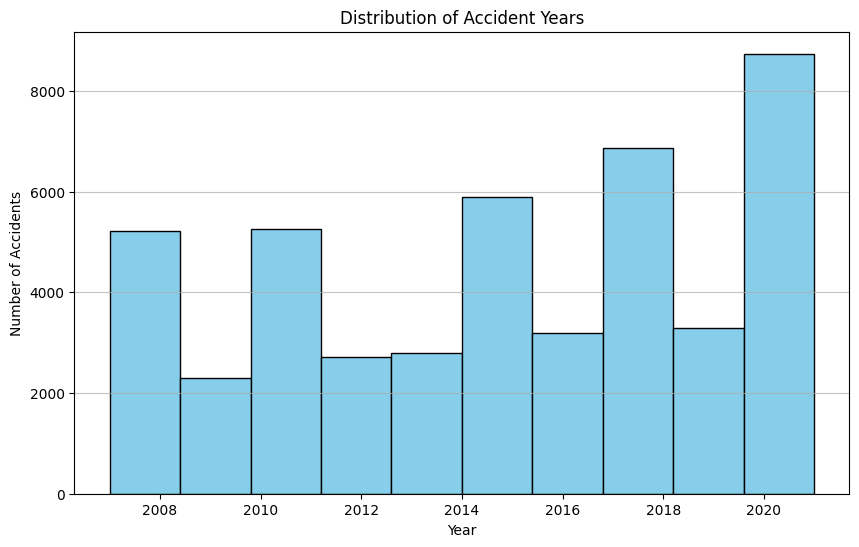

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.hist(df_numerical['Year'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Accident Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', alpha=0.75)
plt.show()

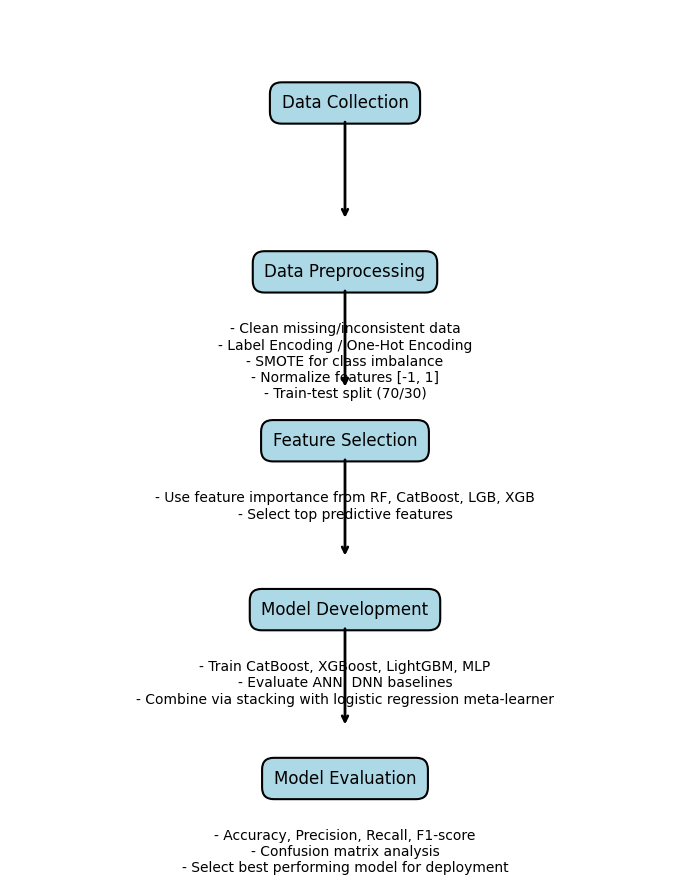

In [ ]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(figsize=(7, 9))

box_props = dict(boxstyle="round,pad=0.7", fc="lightblue", ec="black", lw=1.5)

steps = [
    ("Data Collection", ""),
    ("Data Preprocessing", "- Clean missing/inconsistent data\n- Label Encoding / One-Hot Encoding\n- SMOTE for class imbalance\n- Normalize features [-1, 1]\n- Train-test split (70/30)"),
    ("Feature Selection", "- Use feature importance from RF, CatBoost, LGB, XGB\n- Select top predictive features"),
    ("Model Development", "- Train CatBoost, XGBoost, LightGBM, MLP\n- Evaluate ANN, DNN baselines\n- Combine via stacking with logistic regression meta-learner"),
    ("Model Evaluation", "- Accuracy, Precision, Recall, F1-score\n- Confusion matrix analysis\n- Select best performing model for deployment")
]

y_positions = [0.9, 0.7, 0.5, 0.3, 0.1]

for y, (title, desc) in zip(y_positions, steps):
    ax.text(0.5, y, title, fontsize=12, ha='center', va='top', bbox=box_props)
    if desc:
        ax.text(0.5, y-0.07, desc, fontsize=10, ha='center', va='top')

# Draw arrows between boxes
for i in range(len(y_positions)-1):
    ax.annotate("", xy=(0.5, y_positions[i+1]+0.05), xytext=(0.5, y_positions[i]-0.03),
                arrowprops=dict(arrowstyle="->", lw=2))

ax.axis('off')
plt.tight_layout()

# Define the directory path where you want to save the file
save_dir = '/content/drive/My Drive' # Or use '/content' if not using Google Drive

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    # This might not be necessary if mounting drive was successful,
    # but it's good practice if saving to an arbitrary path
    os.makedirs(save_dir)

# Construct the full save path
save_path = os.path.join(save_dir, "road_accident_workflow_diagram.png")

# Save the figure to the updated path
plt.savefig(save_path)
plt.show()

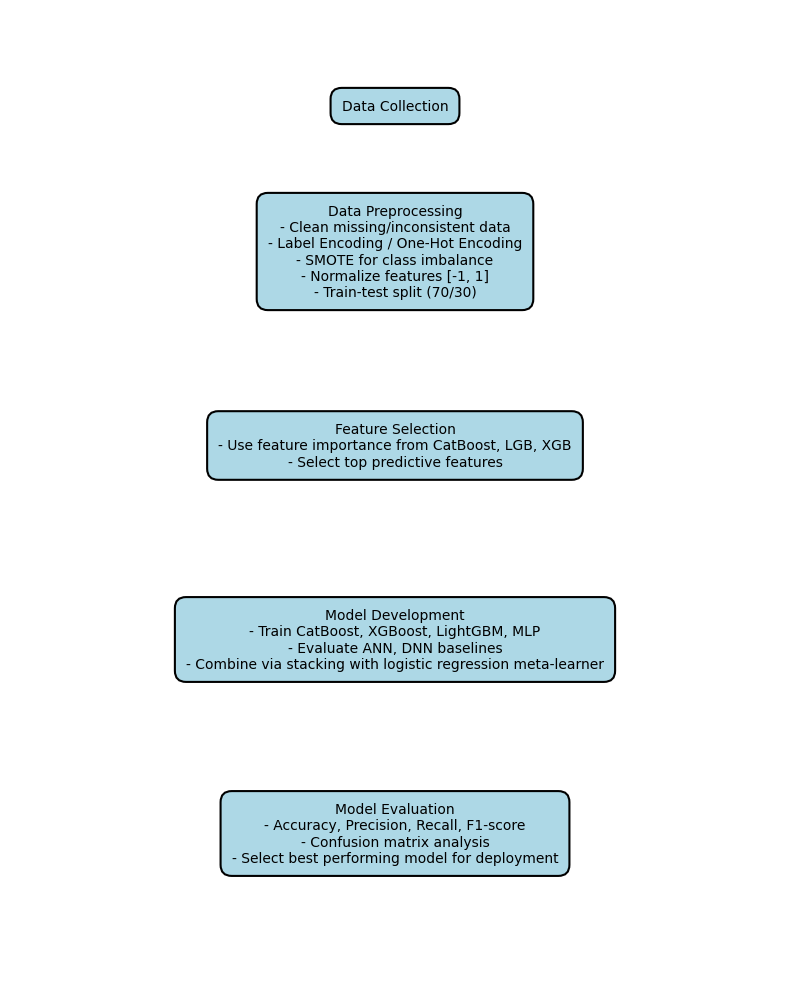

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 10))

# Box properties
box_props = dict(boxstyle="round,pad=0.8", fc="lightblue", ec="black", lw=1.5)

# Define steps with position (x, y) and text
steps = [
    (0.5, 0.9, "Data Collection"),
    (0.5, 0.75, "Data Preprocessing\n- Clean missing/inconsistent data\n- Label Encoding / One-Hot Encoding\n- SMOTE for class imbalance\n- Normalize features [-1, 1]\n- Train-test split (70/30)"),
    (0.5, 0.55, "Feature Selection\n- Use feature importance from CatBoost, LGB, XGB\n- Select top predictive features"),
    (0.5, 0.35, "Model Development\n- Train CatBoost, XGBoost, LightGBM, MLP\n- Evaluate ANN, DNN baselines\n- Combine via stacking with logistic regression meta-learner"),
    (0.5, 0.15, "Model Evaluation\n- Accuracy, Precision, Recall, F1-score\n- Confusion matrix analysis\n- Select best performing model for deployment")
]

# Draw boxes with text
for (x, y, text) in steps:
    ax.text(x, y, text, ha='center', va='center', fontsize=10,
            bbox=box_props)


# Remove axes
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from graphviz import Digraph

dot = Digraph('Accident_Severity_Workflow', format='png')

# Graph attributes for better style
dot.attr(rankdir='TB', size='8,10', fontsize='12', fontname='Helvetica', bgcolor='white')

# Node style
node_attr = {
    'shape': 'rectangle',
    'style': 'filled,rounded',
    'fontname': 'Helvetica',
    'fontsize': '11',
    'color': '#6EA5D7',   # blue border
    'fillcolor': '#BFD9EB',  # light blue fill
    'width': '4',
    'height': '1',
    'margin': '0.2,0.15'
}

# Define nodes with customized text
dot.node('A', 'Data Collection')
dot.node('B', '''Data Preprocessing
- Clean missing/inconsistent data
- Label Encoding / One-Hot Encoding
- SMOTE for class imbalance
- Normalize features [-1, 1]
- Train-test split (70/30)''')
dot.node('C', '''Feature Selection
- Use feature importance from CatBoost, LGB, XGB
- Select top predictive features''')
dot.node('D', '''Model Development
- Train CatBoost, XGBoost, LightGBM, MLP
- Evaluate ANN, DNN baselines
- Combine via stacking with logistic regression meta-learner''')
dot.node('E', '''Model Evaluation
- Accuracy, Precision, Recall, F1-score
- Confusion matrix analysis
- Select best performing model for deployment''')

# Apply node attributes
for n in ['A', 'B', 'C', 'D', 'E']:
    dot.node(n, _attributes=node_attr)

# Define edges with arrows and style
dot.edge('A', 'B', color='#2F5597', penwidth='2')
dot.edge('B', 'C', color='#2F5597', penwidth='2')
dot.edge('C', 'D', color='#2F5597', penwidth='2')
dot.edge('D', 'E', color='#2F5597', penwidth='2')

# Render to file and display path
output_path = dot.render(filename='professional_workflow_diagram')
print(f'Diagram saved as: {output_path}')


Diagram saved as: professional_workflow_diagram.png
